# Assignment 3: Linear Classifiers

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### 2. Read Dataset for Heart patients

In [2]:
#Read the heart patient dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3. Split the dataset into training set and test set at 70:30 ratio.

In [3]:
#Split the Dataset for training and testing @70:30 ratio
df_train,df_test = train_test_split(df,train_size=0.7, test_size=0.3, random_state=42, shuffle=True)

print('Number of training dataset: ', len(df_train))
print('Number of test dataset: ', len(df_test))

Number of training dataset:  212
Number of test dataset:  91


### 4. Seperate the dataset into X and Y where X referes to the Actual dataset and Y referes to the target dataset, which will we predicting by applying different Linear classifiers.

In [4]:
#Drop the target column from test and training dataset
X_train = df_train.drop(columns='target')
X_test  = df_test.drop(columns='target')

#Take the target column for the prediction
Y_train = df_train['target']
Y_test  = df_test['target']

#Counting number of heart patient in different set
total_train_heart_patient = Y_train[Y_train==1]
total_train_no_heart_patient = Y_train[Y_train==0]

total_test_heart_patient = Y_test[Y_test==1]
total_test_no_heart_patient = Y_test[Y_test==0]

print('For training...')
print('Total heart patient in the dataset: ', len(total_train_heart_patient))
print('Total patient having no heart deseases: ', len(total_train_no_heart_patient))
print('\nFor testing...')
print('Total heart patient in the dataset: ', len(total_test_heart_patient))
print('Total patient having no heart deseases: ', len(total_test_no_heart_patient))

For training...
Total heart patient in the dataset:  115
Total patient having no heart deseases:  97

For testing...
Total heart patient in the dataset:  50
Total patient having no heart deseases:  41


### 5.1 Traning the dataset using Half Space Classifier(Using Perceptron Algorithm)

Using perceptron algorithm...
Accuracy: 73.63%


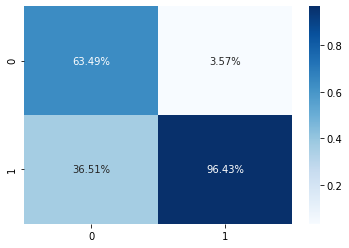

In [5]:
random_state = 0
tol = 1e-3

#Build a model of Perceptron
clf_pctn = Perceptron(tol=tol, random_state=random_state)

#Training the X_train dataset
clf_pctn.fit(X_train,Y_train)

#Predicting the X_test(testing) Dataset
y_pred = clf_pctn.predict(X_test)

#Get the score/accuracy_score between y_pred and Y_test
print('Using perceptron algorithm...')
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test,y_pred)*100))

#Plot confusion matrix for checking how it is predicted
cfu_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cfu_matrix/sum(cfu_matrix), annot=True,fmt='.2%', cmap='Blues')

### 5.2 Training the dataset  using Logistic Regression (using inbuilt function)

Using Logistic Regression...
Accuracy: 81.32%


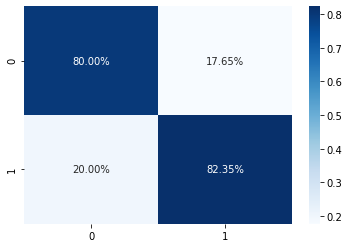

In [6]:
random_state = 0
max_iter = 1000

#Build a model of Logistic Regression
clf_lgr = LogisticRegression(random_state=random_state, max_iter=max_iter)

#Training the X_train dataset
clf_lgr.fit(X_train,Y_train)

#Predicting the X_test(testing) Dataset
y_pred = clf_lgr.predict(X_test)

#Get the score/accuracy_score between y_pred and Y_test
print('Using Logistic Regression...')
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test,y_pred)*100))

#Plot confusion matrix for checking how it is predicted
cfu_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cfu_matrix/sum(cfu_matrix), annot=True,fmt='.2%', cmap='Blues')

### 5.3 Training the dataset using SVM classifier (using a linear kernel)

Using SVM linear kernel...
Accuracy: 81.32%


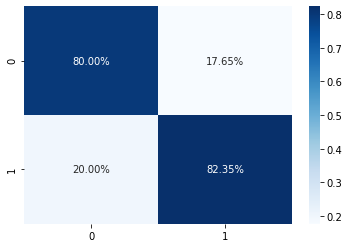

In [7]:
random_state = 0
kernel = 'linear'

#Build a model of SVM with StandardScalar
clf_svm_l = make_pipeline(StandardScaler(),SVC(random_state=random_state, kernel=kernel))

#Training the X_train dataset
clf_svm_l.fit(X_train,Y_train)

#Predicting the X_test(testing) Dataset
y_pred = clf_svm_l.predict(X_test)

#Get the score/accuracy_score between y_pred and Y_test
print('Using SVM linear kernel...')
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test,y_pred)*100))

#Plot confusion matrix for checking how it is predicted
cfu_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cfu_matrix/sum(cfu_matrix), annot=True,fmt='.2%', cmap='Blues')

### 5.4 Training the dataset using SVM classifier (using a Polynomial kernel)

Using SVM Ploynomial kernel...
Accuracy: 83.52%


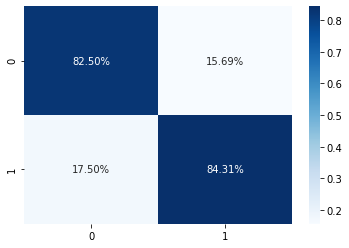

In [8]:
random_state = 0
kernel = 'poly'

#Build a model of SVM with StandardScalar
clf_svm_p = make_pipeline(StandardScaler(), SVC(random_state=random_state, kernel=kernel))

#Training the X_train dataset
clf_svm_p.fit(X_train,Y_train)

#Predicting the X_test(testing) Dataset
y_pred = clf_svm_p.predict(X_test)

#Get the score/accuracy_score between y_pred and Y_test
print('Using SVM Ploynomial kernel...')
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test,y_pred)*100))

#Plot confusion matrix for checking how it is predicted
cfu_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cfu_matrix/sum(cfu_matrix), annot=True,fmt='.2%', cmap='Blues')

### 5.5 Training the dataset using SVM classifier (using a Gaussian kernel)

Using SVM gussian kernel...
Accuracy: 82.42%


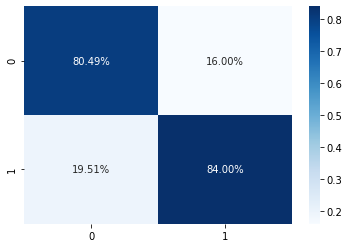

In [9]:
random_state = 0
kernel = 'rbf'

#Build a model of SVM with StandardScalar
clf_svm_g = make_pipeline(StandardScaler(),SVC(random_state=random_state, kernel=kernel))

#Training the X_train dataset
clf_svm_g.fit(X_train,Y_train)

#Predicting the X_test(testing) Dataset
y_pred = clf_svm_g.predict(X_test)

#Get the score/accuracy_score between y_pred and Y_test
print('Using SVM gussian kernel...')
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test,y_pred)*100))

#Plot confusion matrix for checking how it is predicted
cfu_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cfu_matrix/sum(cfu_matrix), annot=True,fmt='.2%', cmap='Blues')

 ### 5.6 Training the dataset using Logistic Regression using the SGD procedure. 

Using SGD classifier...
Accuracy: 84.62%


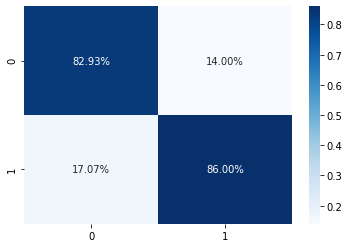

In [11]:
random_state = 0
max_iter=1000
tol=1e-3
alpha=0.001
from sklearn.metrics import confusion_matrix
#Build a model of SGDClassifier with StandardScalar
clf_svm_sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=max_iter,alpha=alpha))

#Training the X_train dataset
clf_svm_sgd.fit(X_train,Y_train)

#Predicting the X_test(testing) Dataset
y_pred = clf_svm_sgd.predict(X_test)

#Get the score/accuracy_score between y_pred and Y_test
print('Using SGD classifier...')
print("Accuracy: {0:.2f}%".format(accuracy_score(Y_test,y_pred)*100))

#Plot confusion matrix for checking how it is predicted
cfu_matrix = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cfu_matrix/sum(cfu_matrix), annot=True,fmt='.2%', cmap='Blues')